In [10]:
import cv2
import os 
import sys 
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive

In [6]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [9]:
IMAGE_PATH = "/content/drive/MyDrive/dataset/image/beatles01.jpg"


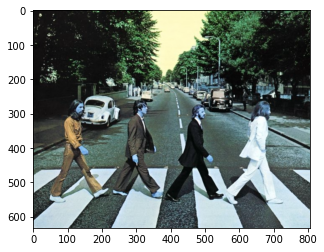

In [33]:
#image = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
image = cv2.imread(IMAGE_PATH)
plt.imshow(image)

In [14]:
!mkdir ./pretrained
!wget -O ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

--2022-06-28 00:22:52--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.69.128, 2a00:1450:4013:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.69.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

./pretrained/faster 100%[===================>] 363.69M  85.0MB/s    in 4.3s    

2022-06-28 00:22:57 (85.0 MB/s) - ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2022-06-28 00:22:57--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.gi

In [15]:
!tar -xvf ./pretrained/faster*.tar.gz -C ./pretrained 

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


In [16]:
!pwd
!ls -lia ./pretrained/faster_rcnn_resnet50_coco_2018_01_28

/content
total 296076
6684961 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 .
6684957 drwxr-xr-x 3 root   root      4096 Jun 28 00:23 ..
6684963 -rw-r--r-- 1 345018 5000        77 Feb  1  2018 checkpoint
6684970 -rw-r--r-- 1 345018 5000 120549957 Feb  1  2018 frozen_inference_graph.pb
6684965 -rw-r--r-- 1 345018 5000 176914228 Feb  1  2018 model.ckpt.data-00000-of-00001
6684962 -rw-r--r-- 1 345018 5000     14460 Feb  1  2018 model.ckpt.index
6684966 -rw-r--r-- 1 345018 5000   5675175 Feb  1  2018 model.ckpt.meta
6684964 -rw-r--r-- 1 345018 5000      3240 Feb  1  2018 pipeline.config
6684967 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 saved_model


In [20]:
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_graph.pbtxt')

In [21]:
# OpenCV Yolo 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [22]:
# OpenCV Tensorflow Faster-RCNN
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

In [23]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}


(1, 1, 100, 7)
person : 0.9998
person : 0.9996
person : 0.9993
person : 0.9970
person : 0.8995
car : 0.8922
car : 0.7602
car : 0.7415
car : 0.6930
car : 0.6918
car : 0.6896
car : 0.6717
car : 0.6521
car : 0.5730
car : 0.5679
car : 0.5261
car : 0.5012


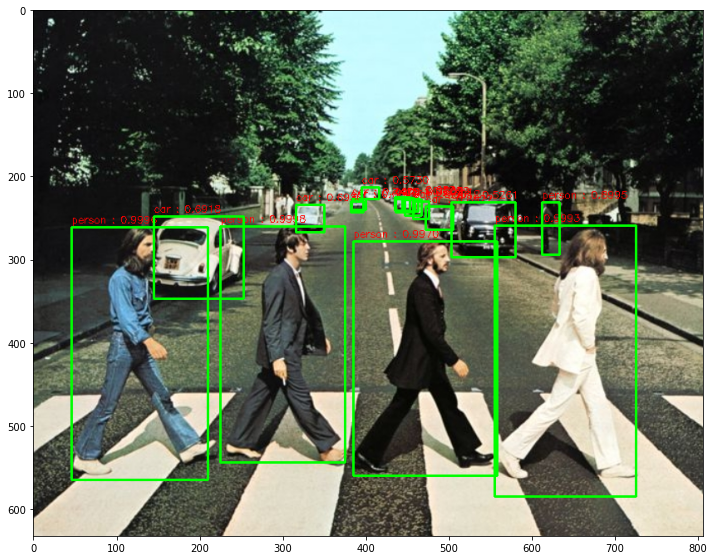

In [34]:
rows = image.shape[0]
cols = image.shape[1]
image_copy = image.copy()

cv_net.setInput(cv2.dnn.blobFromImage(image, swapRB=True, crop=False))

cv_out = cv_net.forward()
print(cv_out.shape)
red_color = (0, 0, 255)
green_color = (0, 255, 0)

for detection in cv_out[0, 0, :, :]:
    score = float(detection[2])
    class_id = int(detection[1])

    if score > 0.5: 
        left = detection[3]* cols
        top = detection[4] * rows 
        right = detection[5] * cols 
        bottom = detection[6] * rows 

        caption = "{} : {:.4f}".format(labels_to_names_0[class_id], score)
        print(caption)
        cv2.rectangle(image_copy, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(image_copy, caption, (int(left), int(top -5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

img_rgb = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)




In [32]:
cv_out

array([[[[0.0000000e+00, 0.0000000e+00, 9.9972183e-01, 2.7851540e-01,
          4.1208202e-01, 4.6595240e-01, 8.6630875e-01],
         [0.0000000e+00, 0.0000000e+00, 9.9873966e-01, 5.4647468e-02,
          3.9705575e-01, 2.6420680e-01, 8.9703548e-01],
         [0.0000000e+00, 0.0000000e+00, 9.9765825e-01, 4.8115075e-01,
          4.3939859e-01, 6.8789756e-01, 8.9511162e-01],
         [0.0000000e+00, 0.0000000e+00, 9.9740928e-01, 6.9255984e-01,
          3.9265072e-01, 8.9970803e-01, 9.3014407e-01],
         [0.0000000e+00, 0.0000000e+00, 8.7267631e-01, 7.5756139e-01,
          3.6256671e-01, 7.8559834e-01, 4.6300691e-01],
         [0.0000000e+00, 0.0000000e+00, 2.7530274e-01, 7.8703761e-01,
          3.7844670e-01, 8.2459486e-01, 4.4941700e-01],
         [0.0000000e+00, 0.0000000e+00, 1.9868219e-01, 1.1780062e-01,
          3.2089081e-01, 9.7900796e-01, 8.6678040e-01],
         [0.0000000e+00, 0.0000000e+00, 2.1613732e-02, 7.9919469e-01,
          3.9902532e-01, 8.6090851e-01, 5.112078